#### CNN (Convolutional Neural Network) Identifikasi bunga menggunakan keras

Nama : M. Tedi Bustami                                                                                                         
NIM : 09011281823072                                                                                                           
Kelas : SK5B Indralaya

#### Persiapan Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

from keras.utils import to_categorical

diperlukan directory data sebagai pengenalan bunga, terdapat beberapa kategori yaitu, daisy, flowers, sunflower, tulip, dan rose

In [2]:
dir_data = '../input/flowers-recognition/flowers'

print(os.listdir(dir_data)[1:])
category = os.listdir(dir_data)[1:]


['daisy', 'flowers', 'sunflower', 'tulip', 'rose']


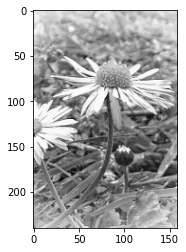

[[236 235 235 ... 225 226 227]
 [227 229 230 ... 219 220 220]
 [222 224 226 ... 221 220 219]
 ...
 [145 150 161 ... 222 225 218]
 [159 147 147 ... 221 223 213]
 [151 128 146 ... 213 210 214]]


In [3]:
for bunga in category:  
    path = os.path.join(dir_data,bunga)
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break 
    break 

print(img_array)

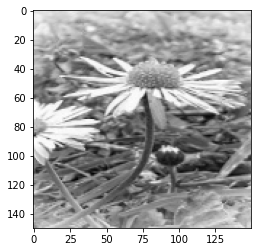

In [4]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for bunga in category:  # do dogs and cats

        path = os.path.join(dir_data,bunga) 
        class_num = category.index(bunga)
        
        for img in tqdm(os.listdir(path)): 
            try:
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass
        
create_training_data()


100%|██████████| 784/784 [00:09<00:00, 83.94it/s]


In [6]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[:5])
#print(y[:5])

2
3
3
0
4
4
4
3
4
3


In [7]:
len(X)

3271

In [8]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [9]:
X.shape

(3271, 150, 150, 1)

In [10]:
y.shape

(3271,)

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [12]:
x_train.shape

(2616, 150, 150, 1)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

In [14]:
y_test.shape

(655,)

In [15]:
y_trainfix = to_categorical(y_train)
y_testfix = to_categorical(y_test)
print(y_trainfix[:5])
print(y_testfix[:5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Gambar berukuran 150 x 150. Gambar diubah menjadi array, dengan ukurannya antara 0 dan 1, bentuk ulang sehingga berukuran 150 x 150 x 1, dan masukkan ini sebagai input ke dalam Network.

In [17]:
batch_size = 1
epochs = 20
num_classes = 5

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,150,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 128)       7

In [21]:
x_train.shape, y_trainfix.shape

((2616, 150, 150, 1), (2616, 5))

In [22]:
trainpak = model.fit(x_train, y_trainfix, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_testfix))

Epoch 1/20
2616/2616 [==============================] - 146s 56ms/step - loss: 1.3908 - accuracy: 0.3330 - val_loss: 1.2948 - val_accuracy: 0.4061
Epoch 2/20
2616/2616 [==============================] - 143s 55ms/step - loss: 1.5425 - accuracy: 0.3521 - val_loss: 1.3015 - val_accuracy: 0.3695
Epoch 3/20
2616/2616 [==============================] - 146s 56ms/step - loss: 1.5810 - accuracy: 0.3211 - val_loss: 1.3317 - val_accuracy: 0.3206
Epoch 4/20
2616/2616 [==============================] - 143s 55ms/step - loss: 1.5079 - accuracy: 0.3284 - val_loss: 1.4148 - val_accuracy: 0.3527
Epoch 5/20
2616/2616 [==============================] - 146s 56ms/step - loss: 1.3705 - accuracy: 0.3345 - val_loss: 1.2833 - val_accuracy: 0.4061
Epoch 6/20
2616/2616 [==============================] - 143s 55ms/step - loss: 1.9547 - accuracy: 0.3437 - val_loss: 1.4378 - val_accuracy: 0.3496
Epoch 7/20
2616/2616 [==============================] - 143s 55ms/step - loss: 1.4863 - accuracy: 0.3368 - val_loss: 1